In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"3b865713af85f5da0dba3b577e289484"}
def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [18]:
r = get(baseUrl)
names = [sim['name'] for sim in r['simulations']]
i = names.index('TNG100-1')
sim = get( r['simulations'][i]['url'] )
snaps = get( sim['snapshots'] )
snap = get( snaps[-1]['url'] )

subid = [884246]
num = 0

print(str(subid[num]))

query_url = "http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/" + str(subid[num])
query_subhalo = get(query_url)
print('Number of subhalos', query_subhalo)



884246
Number of subhalos {'snap': 33, 'id': 884246, 'bhmdot': 0.0, 'cm_x': 39591.4, 'cm_y': 36046.7, 'cm_z': 72945.4, 'gasmetallicity': 0.0, 'gasmetallicityhalfrad': 0.0, 'gasmetallicitymaxrad': 0.0, 'gasmetallicitysfr': 0.0, 'gasmetallicitysfrweighted': 0.0, 'pos_x': 39590.8, 'pos_y': 36049.6, 'pos_z': 72944.4, 'halfmassrad': 8.4798, 'halfmassrad_gas': 0.0, 'halfmassrad_dm': 8.4798, 'halfmassrad_stars': 0.0, 'halfmassrad_bhs': 0.0, 'len': 81, 'len_gas': 0, 'len_dm': 81, 'len_stars': 0, 'len_bhs': 0, 'mass': 0.040952, 'mass_gas': 0.0, 'mass_dm': 0.040952, 'mass_stars': 0.0, 'mass_bhs': 0.0, 'massinhalfrad': 0.0, 'massinhalfrad_gas': 0.0, 'massinhalfrad_dm': 0.0, 'massinhalfrad_stars': 0.0, 'massinhalfrad_bhs': 0.0, 'massinmaxrad': 0.032862, 'massinmaxrad_gas': 0.0, 'massinmaxrad_dm': 0.032862, 'massinmaxrad_stars': 0.0, 'massinmaxrad_bhs': 0.0, 'massinrad': 0.0, 'massinrad_gas': 0.0, 'massinrad_dm': 0.0, 'massinrad_stars': 0.0, 'massinrad_bhs': 0.0, 'sfr': 0.0, 'sfrinhalfrad': 0.0, 's

In [5]:
# Display the beautiful photo:
query_subhalo['vis']['galaxy_stellar_light']

'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/884246/vis.png?partType=stars&partField=stellarComp-jwst_f200w-jwst_f115w-jwst_f070w&size=5.0&sizeType=rHalfMassStars'

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

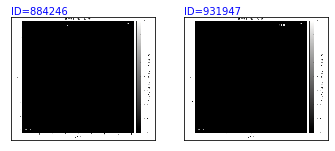

In [17]:
import matplotlib.image as mpimg
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3
    
ids = [884246,931947,931947,2,3]

sub_count = 1

plt.clf()
plt.figure(figsize=[15,3])

for id in ids:
    url = "http://www.tng-project.org/api/TNG100-1/snapshots/33/subhalos/" + str(id)
    sub = get(url)
    # it is of course possible this data product does not exist for all requested subhalos
    if 'galaxy_stellar_light' in sub['vis']: 
        # download PNG image, the version which includes all stars in the FoF halo (try replacing 'fof' with 'gz')
        png_url = sub['vis']['galaxy_stellar_light']#['image_fof']
        response = get(png_url)
        # make plot a bit nicer
        plt.subplot(1,len(ids),sub_count)
        plt.text(0,-20,"ID="+str(id),color='blue')
        plt.gca().axes.get_xaxis().set_ticks([])
        plt.gca().axes.get_yaxis().set_ticks([])
        sub_count += 1
        
        # plot the PNG binary data directly, without actually saving a .png file
        file_object = StringIO(response)
        plt.imshow(mpimg.imread(response))
        
plt.show()